# The total, available, and used memory of the system in a readable format like "GB" or "MB".

In [1]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Info", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")

======================================== Memory Info ========================================
Total: 8.00GB
Available: 1.71GB
Used: 4.22GB


# Import Files

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading the DATA

In [5]:
import os
import requests
from zipfile import ZipFile
from io import BytesIO
from sklearn.datasets import load_files
# Define the URL of the dataset
url = 'https://github.com/SriPenumatcha/Flower-Identification-using-deep-learning/archive/refs/heads/main.zip'
# Download the dataset
response = requests.get(url)
if response.status_code == 200:
    # Extract the dataset
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/tmp')
# Path to the extracted dataset
data_dir = '/tmp/Flower-Identification-using-deep-learning-main/flowers'
# Load the data
data = load_files(data_dir)
# Display some information about the loaded data
print(f"Number of samples: {len(data.data)}")
print(f"Target names: {data.target_names}")

Number of samples: 4317
Target names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# DATA Processing and Exploration

In [6]:
# List the content of the Folder
folders = os.listdir(data_dir)
print(folders)

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


# We have a folder for each flower class or type, and you want to load the data into two NumPy arrays:

- X: Filenames (training data)
- y: Flower names (target labels)

In [7]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

# Arrays
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/7176729016_d73ff2211e.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/18385846351_3a2bf60427_n.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/98992760_53ed1d26a9.jpg'
 ...
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/7184780734_3baab127c2_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/10386540106_1431e73086_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/164670176_9f5b9c7965.jpg']
Target labels -  [3 1 1 ... 1 3 3]


The numbers in the **Target labels as [3 1 1 ... 1 3 3]** are corresponding to class label. We need to change them to a vector of 5 elements (5 classes)

In [9]:
encoder = OneHotEncoder()


In [10]:
# Reshape y to a 2D array
y_reshaped = y.reshape(-1, 1)

In [11]:
# Perform one-hot encoding
y_onehot = encoder.fit_transform(y_reshaped)

In [12]:
# Display the one-hot encoded target labels
print('One-hot encoded target labels:')
print(y_onehot)

One-hot encoded target labels:
  (0, 3)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 2)	1.0
  (7, 3)	1.0
  (8, 1)	1.0
  (9, 4)	1.0
  (10, 2)	1.0
  (11, 0)	1.0
  (12, 2)	1.0
  (13, 4)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 3)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 4)	1.0
  (20, 0)	1.0
  (21, 4)	1.0
  (22, 2)	1.0
  (23, 4)	1.0
  (24, 3)	1.0
  :	:
  (4292, 0)	1.0
  (4293, 3)	1.0
  (4294, 0)	1.0
  (4295, 1)	1.0
  (4296, 0)	1.0
  (4297, 2)	1.0
  (4298, 0)	1.0
  (4299, 2)	1.0
  (4300, 2)	1.0
  (4301, 2)	1.0
  (4302, 2)	1.0
  (4303, 3)	1.0
  (4304, 0)	1.0
  (4305, 1)	1.0
  (4306, 3)	1.0
  (4307, 2)	1.0
  (4308, 2)	1.0
  (4309, 2)	1.0
  (4310, 0)	1.0
  (4311, 4)	1.0
  (4312, 1)	1.0
  (4313, 3)	1.0
  (4314, 1)	1.0
  (4315, 3)	1.0
  (4316, 3)	1.0


## Removing the .pyc or .py files from X and y:
- This loop iterates over the positions of .pyc or .py files found in the previous step.
- np.delete(X, pos) removes the elements at the specified positions from the array X.
- Similarly, np.delete(y, pos) removes the corresponding elements from the array y.

In [13]:
# Find positions of .pyc or .py files in X
pos = [i for i, filename in enumerate(X) if filename.endswith('.pyc') or filename.endswith('.py')]

# Remove elements at the specified positions from X and y
X = np.delete(X, pos)
y = np.delete(y, pos)

# Verify the updated X and y arrays
print('Updated Data files - ', X)
print('Updated Target labels - ', y)

Updated Data files -  ['/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/7176729016_d73ff2211e.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/18385846351_3a2bf60427_n.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/98992760_53ed1d26a9.jpg'
 ...
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/7184780734_3baab127c2_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/10386540106_1431e73086_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/164670176_9f5b9c7965.jpg']
Updated Target labels -  [3 1 1 ... 1 3 3]


# Loading the Images

## Converts a list of image file paths into an array of image data, resizes the images, and prints the shape of the resulting array and the first training item. The steps include:
- Importing necessary functions from Keras:
- Defining the convert_img_to_arr function:
- Converting the list of image arrays to a NumPy array:
- Printing the shape of the array and the first training item:

In [14]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import numpy as np

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150, 150
    for file_path in file_path_list:
        img = load_img(file_path, target_size=(img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr

X = np.array(convert_img_to_arr(X))
print(X.shape)
print('First training item : ', X[0])

2024-08-01 20:25:45.877239: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(4317, 150, 150, 3)
First training item :  [[[101. 114.   8.]
  [ 33.  38.  18.]
  [ 23.  29.  15.]
  ...
  [  1. 102. 190.]
  [  4. 103. 188.]
  [ 13.  74. 128.]]

 [[ 31.  39.  15.]
  [ 23.  32.  15.]
  [ 23.  27.  12.]
  ...
  [  0.  47. 106.]
  [  8.  72. 116.]
  [ 24.  77. 121.]]

 [[ 54.  62.  15.]
  [ 28.  32.  17.]
  [ 29.  32.  21.]
  ...
  [  0.  55. 103.]
  [  5.  34.  66.]
  [  5.  31.  64.]]

 ...

 [[ 99.  96.  27.]
  [ 82.  84.  21.]
  [ 72.  68.  33.]
  ...
  [ 94. 112. 134.]
  [ 88. 101. 118.]
  [ 78.  89. 107.]]

 [[114. 107.  17.]
  [109.  99.  40.]
  [108.  84.  60.]
  ...
  [ 87. 105. 129.]
  [ 83. 103. 130.]
  [ 86.  97. 115.]]

 [[166. 157.  56.]
  [130. 112.  36.]
  [184. 178.  28.]
  ...
  [ 32.  32.  30.]
  [ 64.  75.  81.]
  [ 83.  95. 117.]]]


## **Key Points:**
- The shape of training data is (4317, 150, 150, 3)
- 4317 is the number of training items or files
- (150,150) is the target size or image size provided while loading image
- 3 refers to the depth for colored images ( RGB channels )

# Have a look at some beautiful Flower Images

Data type of X: float32
Min value in X: 0.0
Max value in X: 255.0
Labels: [3 1 1 0 4]
Corresponding folder names: ['dandelion', 'rose', 'rose', 'daisy', 'sunflower']
Shape of first image: (150, 150, 3)


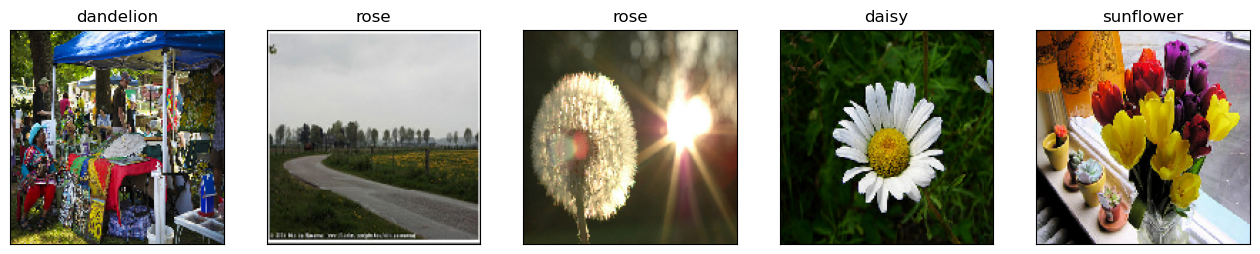

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Debugging: Check data type and range
print(f"Data type of X: {X.dtype}")
print(f"Min value in X: {X.min()}")
print(f"Max value in X: {X.max()}")

# Debugging: Check label indexing
print(f"Labels: {y[:5]}")
print(f"Corresponding folder names: {[folders[label] for label in y[:5]]}")

# Debugging: Check image shape
print(f"Shape of first image: {X[0].shape}")

fig = plt.figure(figsize=(16, 9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].astype(np.uint8))
    ax.set_title(folders[y[i]])
plt.show()

In [16]:
# rescale the training data
X = X.astype('float32')/255
# Confirming number of class
num_classes = len(np.unique(y))
print('Number of classes : ', num_classes)

Number of classes :  5


In [17]:
y

array([3, 1, 1, ..., 1, 3, 3])

In [18]:
from keras.utils import to_categorical
y = to_categorical(y)
y[0]

array([0., 0., 0., 1., 0.])

In [19]:
from sklearn.model_selection import train_test_split
# splite the data into subsets and explore their shapes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  864
The training Data Shape  432


In [20]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


In [21]:
# Check the shape of X_train (input data) and X_test
print("Shape of X_train (input data):", X_train.shape)
print("Shape of X_test (input data):", X_test.shape)

Shape of X_train (input data): (3453, 150, 150, 3)
Shape of X_test (input data): (432, 150, 150, 3)


In [22]:
# Check the shape of y_train (target labels) and y_test
print("Shape of y_train (target labels):", y_train.shape)
print("Shape of y_test (target labels):", y_test.shape)

Shape of y_train (target labels): (3453, 5)
Shape of y_test (target labels): (432, 5)


In [21]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input layer
inputs = Input(shape=(150, 150, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten layer
x = Flatten()(x)

# Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)

# Output layer
outputs = Dense(5, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                             

In [22]:
import time

start_time = time.time()  # Record the start time

from keras.optimizers import RMSprop

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001)  # You can adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using fit method
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

end_time = time.time()  # Record the end time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

Epoch 1/10
108/108 [==============================] - 697s 6s/step - loss: 1.7293 - accuracy: 0.3194 - val_loss: 1.4978 - val_accuracy: 0.3287
Epoch 2/10
108/108 [==============================] - 791s 7s/step - loss: 1.3216 - accuracy: 0.4332 - val_loss: 1.2639 - val_accuracy: 0.4745
Epoch 3/10
108/108 [==============================] - 699s 6s/step - loss: 1.1791 - accuracy: 0.5126 - val_loss: 1.1499 - val_accuracy: 0.4907
Epoch 4/10
108/108 [==============================] - 698s 6s/step - loss: 1.0718 - accuracy: 0.5775 - val_loss: 1.2550 - val_accuracy: 0.5023
Epoch 5/10
108/108 [==============================] - 694s 6s/step - loss: 0.9644 - accuracy: 0.6365 - val_loss: 1.0419 - val_accuracy: 0.5949
Epoch 6/10
108/108 [==============================] - 700s 6s/step - loss: 0.8332 - accuracy: 0.7037 - val_loss: 0.9339 - val_accuracy: 0.6528
Epoch 7/10
108/108 [==============================] - 700s 6s/step - loss: 0.7211 - accuracy: 0.7425 - val_loss: 0.9836 - val_accuracy: 0.6528

In [24]:
batch_size = 32  # Define the batch size
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)

print("Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("Loss: {}".format(eval_loss))

14/14 - 15s - loss: 1.5233 - accuracy: 0.6713 - 15s/epoch - 1s/step
Accuracy: 67.13%
Loss: 1.5232881307601929


In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the input layer
inputs = Input(shape=(150, 150, 3))

# Convolutional layers with Batch Normalization
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)


# Flatten layer
x = Flatten()(x)

# Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Output layer
outputs = Dense(5, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             

 Total params: 21,591,845 (82.37 MB)

 Trainable params: 21,589,669 (82.36 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [34]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:32: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [35]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Training the model
epochs = 100  # Define the number of epochs
batch_size = 32  # Define the batch size

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
data_generator = ImageDataGenerator()

train_datagenrator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_datagenrator = data_generator.flow(X_valid, y_valid, batch_size=batch_size)

checkpoint = ModelCheckpoint("/Users/vrindapatel/Documents/GitHub/Flower-Identification-using-deep-learning/.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

start_time = time.time()  # Record the start time

# Train the model
history = model.fit(train_datagenrator, epochs=epochs, validation_data=val_datagenrator, callbacks=[checkpoint, learning_rate_reduction])

end_time = time.time()  # Record the end time

duration = end_time - start_time  # Calculate the duration of training
print("Training time: {:.2f} seconds".format(duration))

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3600 - loss: 1.7340
Epoch 1: saving model to /Users/vrindapatel/Documents/GitHub/Flower-Identification-using-deep-learning/.weights.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 824s 8s/step - accuracy: 0.3604 - loss: 1.7324 - val_accuracy: 0.2569 - val_loss: 4.3406 - learning_rate: 0.0010
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5119 - loss: 1.3149
Epoch 2: saving model to /Users/vrindapatel/Documents/GitHub/Flower-Identification-using-deep-learning/.weights.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 674s 6s/step - accuracy: 0.5121 - loss: 1.3142 - val_accuracy: 0.2569 - val_loss: 4.8004 - learning_rate: 0.0010
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5679 - loss: 1.1096
Epoch 3: saving model to /Users/vrindapatel/Documents/GitHub/Flower-Identification-using-deep-learning/.weights.h5
108/108 ━━━━━━━━━━━━━━━━━━━━ 660s 6s/step - accuracy: 0.5679 - loss: 1.1094 - val_accuracy: 0.2847 - val_loss: 3.

In [36]:
# Model evaluation
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("Loss: {}".format(eval_loss))

14/14 - 16s - 1s/step - accuracy: 0.8148 - loss: 0.5550
Accuracy: 81.48%
Loss: 0.5550469756126404


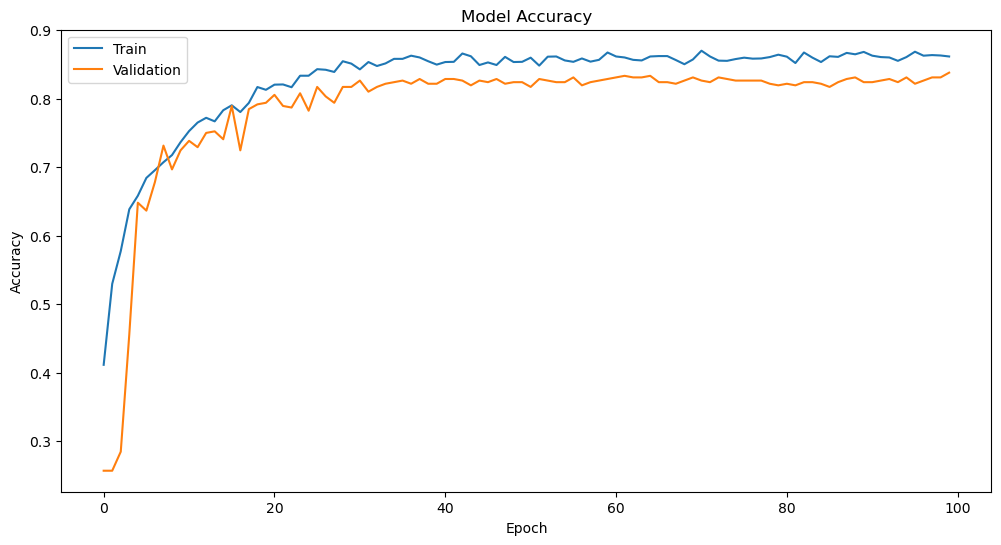

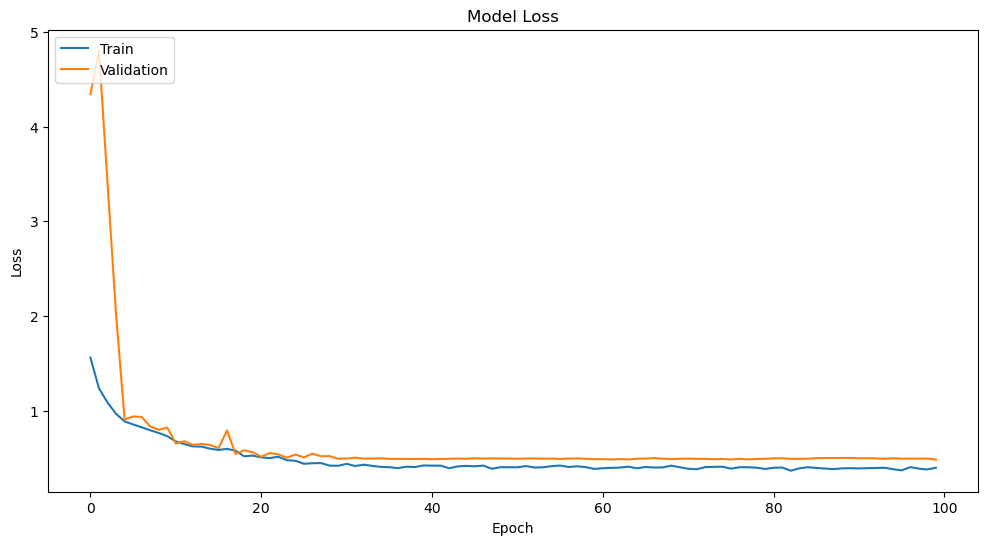

In [38]:
# Accuracy and Loss Graph of the Model

# Accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss graph
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


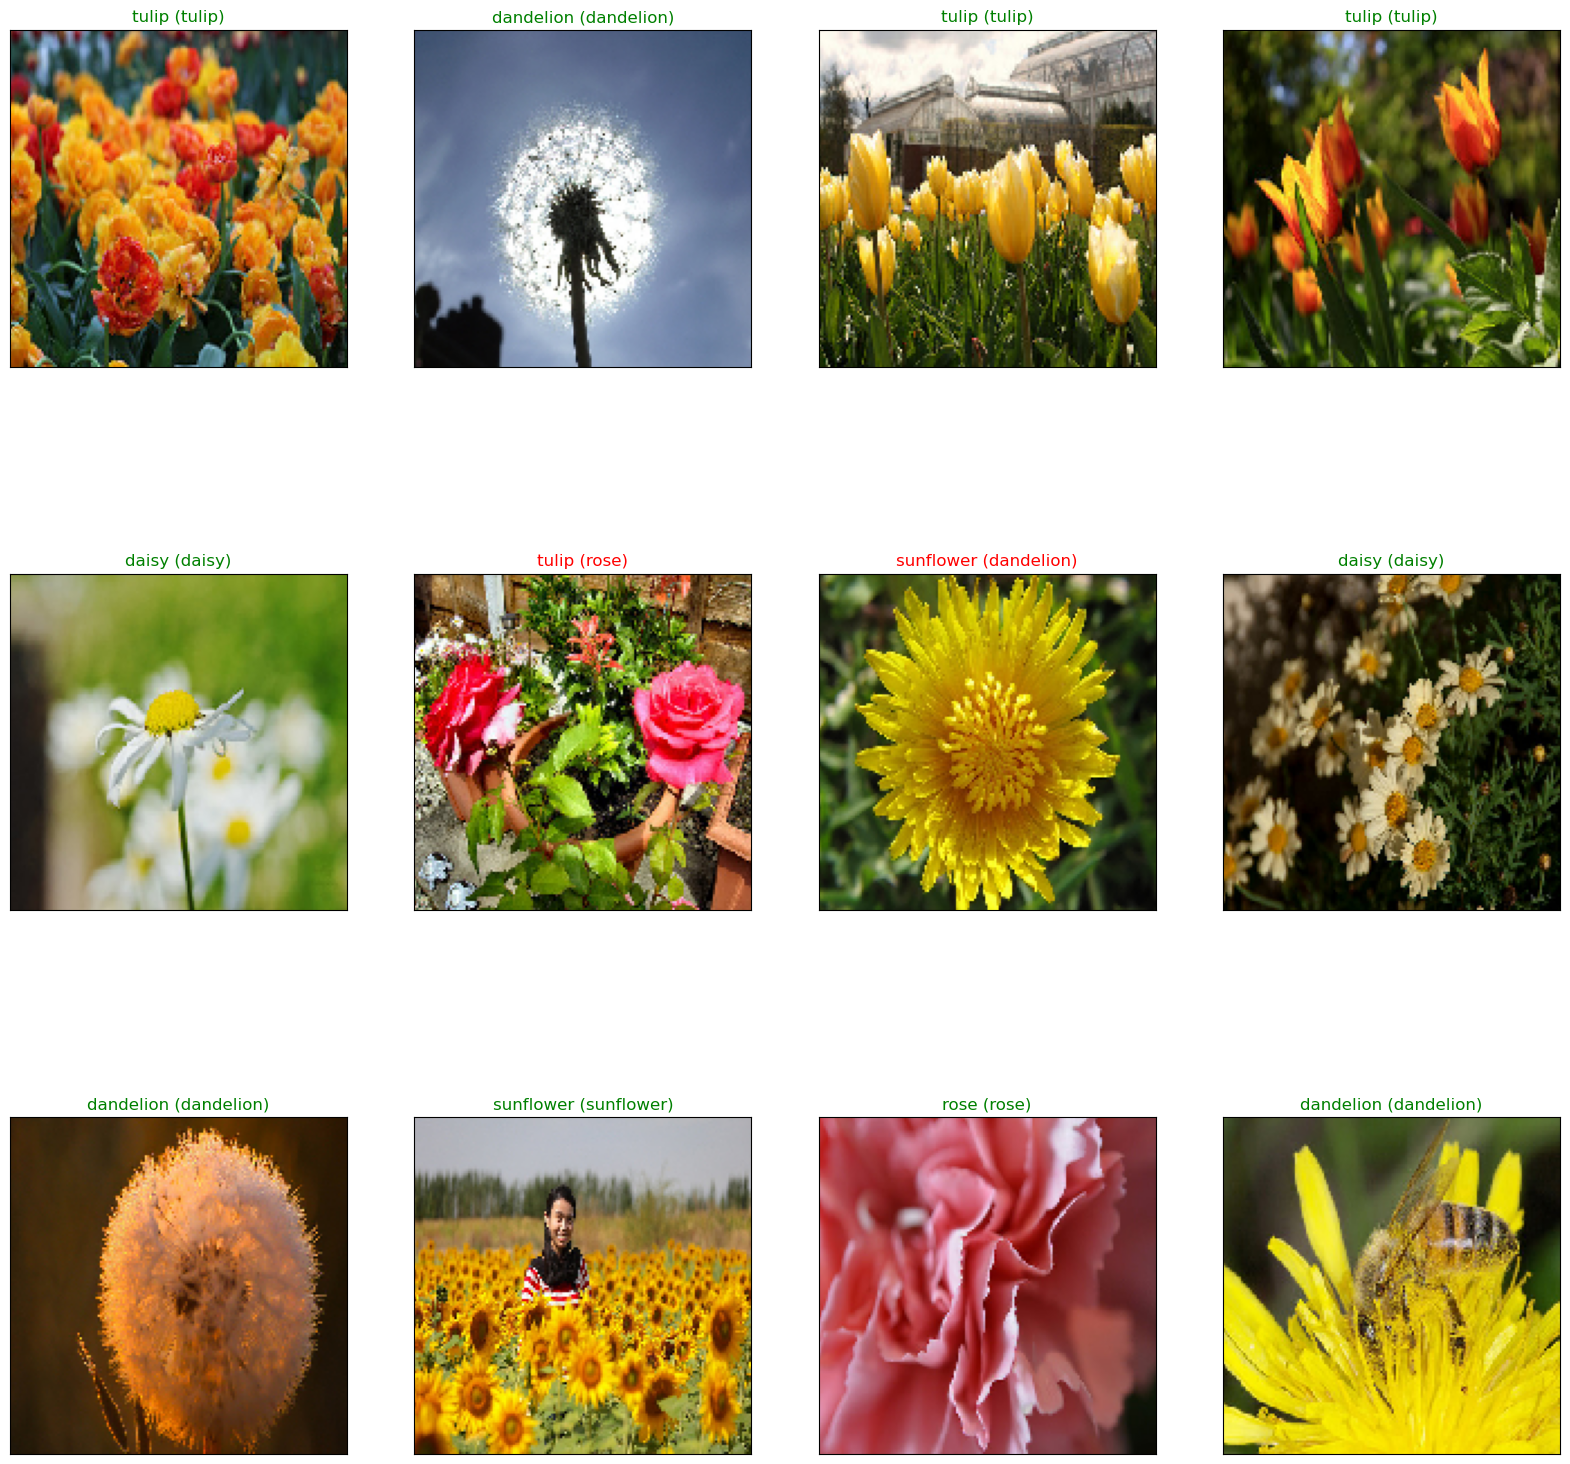

In [50]:
# Visualize the predictions

def visualize_predictions(model, data_generator, num_images=12):
    x_val, y_val = next(data_generator)
    predictions = model.predict(x_val)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_val, axis=1)

    plt.figure(figsize=(20, 20))
    for i, idx in enumerate(np.random.choice(x_val.shape[0], size=num_images, replace=False)):
        ax = plt.subplot(3, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(x_val[idx]))
        pred_idx = predicted_classes[idx]
        true_idx = true_classes[idx]
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

# Call the function to visualize predictions
visualize_predictions(model, val_datagenrator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


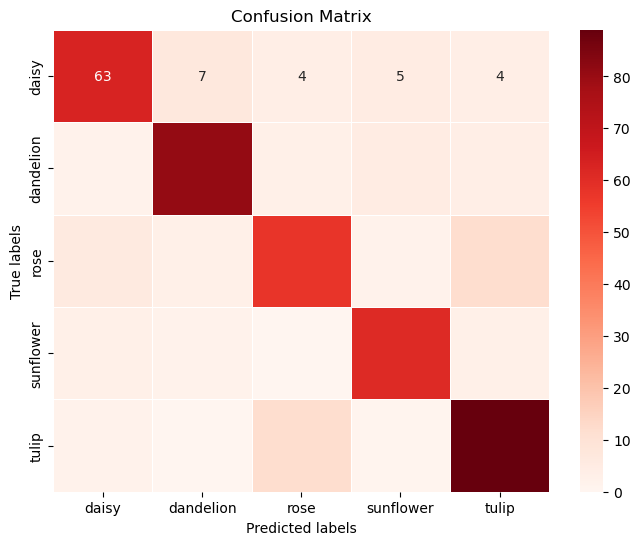

In [67]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Get the predictions for the test data
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5, cmap="Reds", xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


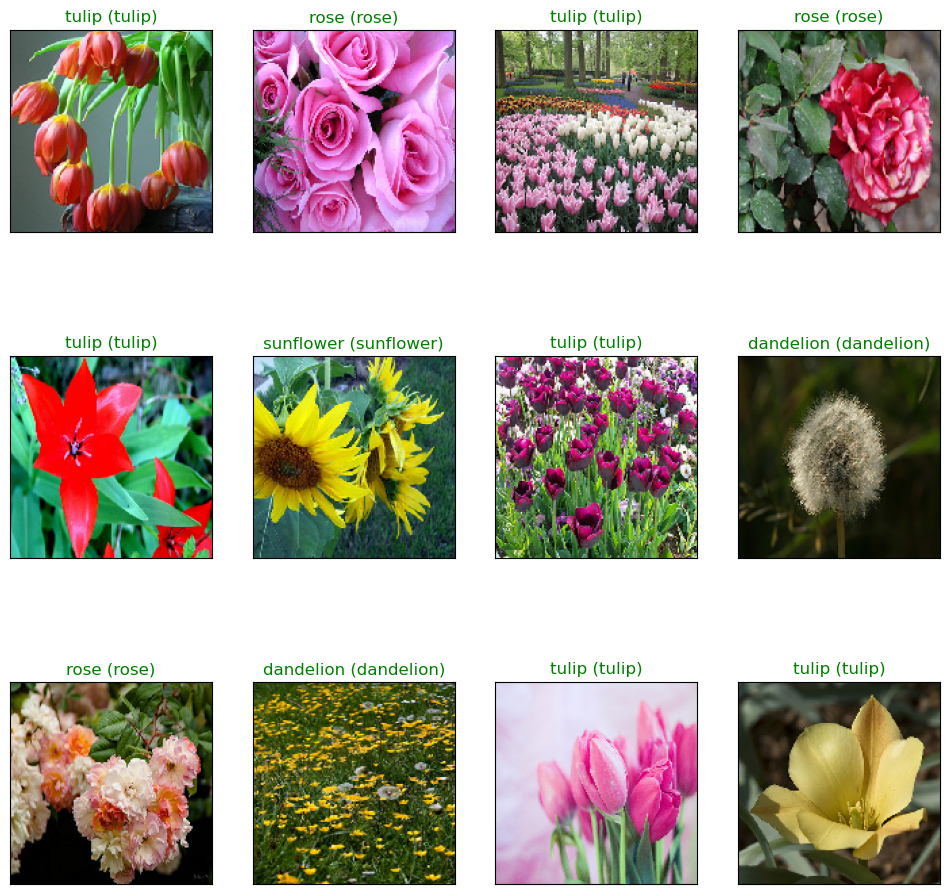

In [70]:
# visualizing the test data
def visualize_predictions(model, data_generator, num_images=12):
    x_val, y_val = next(data_generator)
    predictions = model.predict(x_val)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_val, axis=1)

    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(np.random.choice(x_val.shape[0], size=num_images, replace=False)):
        ax = plt.subplot(3, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(x_val[idx]))
        pred_idx = predicted_classes[idx]
        true_idx = true_classes[idx]
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))
        
visualize_predictions(model, val_datagenrator)